In [1]:
import pandas as pd

In [67]:
#set RUL as target
def get_rul(mydata,label):
    from sklearn import preprocessing
    mydata=pd.merge(mydata,
             mydata.groupby('Asset id').size().reset_index(),on='Asset id',how='left')
    mydata['RUL']=mydata[0]-mydata['runtime']
    y=mydata[label]
    X=mydata.drop(columns=[0,'RUL','Asset id','runtime'])
    return mydata,X,y

In [68]:
# mapping RUL into 1 and 0, 1:RUL<20, 0:RUL>=20
def get_label(mydata,label):
    from sklearn import preprocessing
    mydata=pd.merge(mydata,
             mydata.groupby('Asset id').size().reset_index(),on='Asset id',how='left')
    mydata['RUL']=mydata[0]-mydata['runtime']
    mydata[label]=0
    mydata.loc[mydata['RUL']<=20,label]=1
    y=mydata[label]
    X=mydata.drop(columns=['y',0,'RUL','Asset id','runtime'])
    return mydata,X,y

# Loading data

In [100]:
training_set=pd.read_csv('../data/PM_train.csv')
testing_set=pd.read_csv('../data/PM_test.csv')

###  Calculate RUL and set RUL as target

In [101]:
train_all,X_train,y_train=get_rul(training_set,'RUL')
test_all,X_test,y_test=get_rul(testing_set,'RUL')

### Mapping RUL to binary data, predict whether it will fail within 20 round

In [102]:
train_all,X_train,y_train=get_label(training_set,'y')
test_all,X_test,y_test=get_label(testing_set,'y')

# Data Exploration

In [8]:
### plotting sensor data for engine ID
engine_id = train_all[train_all['Asset id'] == 1]
engine_id[train_all.columns[2:]].plot(subplots=True
                                      , sharex=True
                                      , figsize=(20,30)
                                     )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2984ac32e8>,
      dtype=object)

In [9]:
X_train.describe()

,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
count,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


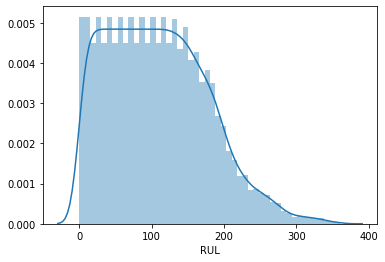

In [140]:
#RUL distribution
sns.distplot(train_all['RUL']);

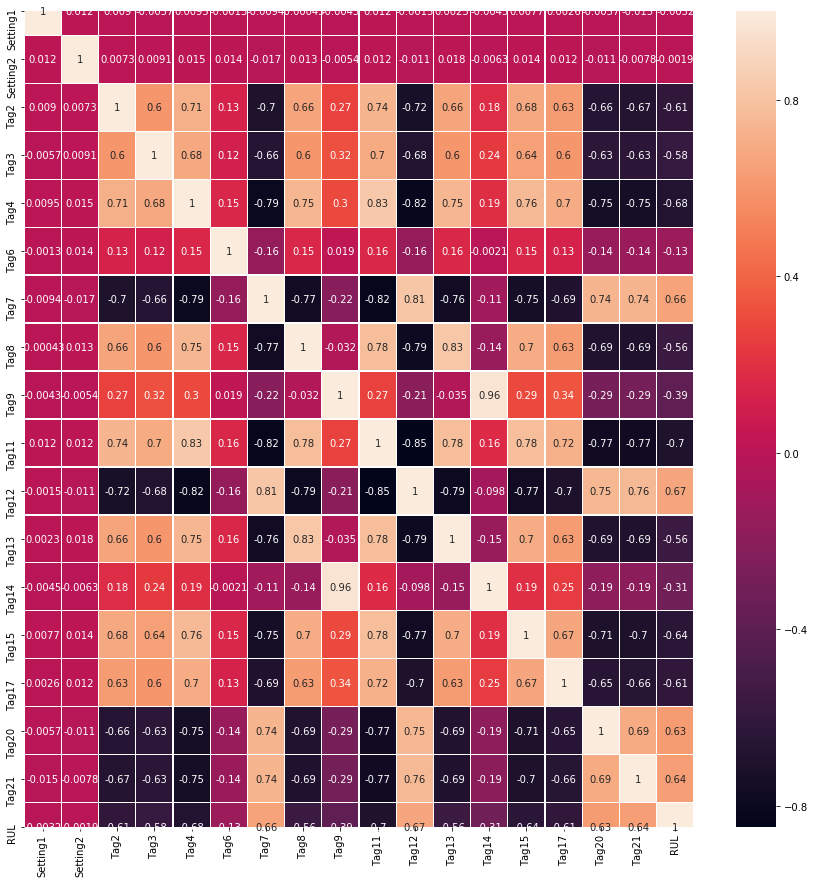

In [47]:
import seaborn as sns
df_corr=train_all[['Setting1', 'Setting2', 'Tag2', 'Tag3', 'Tag4', 'Tag6', 'Tag7', 'Tag8',
       'Tag9', 'Tag11', 'Tag12', 'Tag13', 'Tag14', 'Tag15', 'Tag17', 'Tag20',
       'Tag21','RUL']].corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr, linewidths=.2, annot=True)

In [173]:
train_all[0].drop_duplicates().describe()

count     66.000000
mean     212.075758
std       52.114758
min      128.000000
25%      175.000000
50%      200.500000
75%      238.500000
max      362.000000
Name: 0, dtype: float64

In [174]:
test_all[0].drop_duplicates().describe()

count     80.000000
mean     133.000000
std       56.650829
min       31.000000
25%       88.750000
50%      136.500000
75%      168.750000
max      303.000000
Name: 0, dtype: float64

# Data Modeling

# 1. Binary Prediction. Use Random Forest Classifier to predict 0,1 label

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,f1_score

In [120]:
def get_label_2(mydata,label):
    from sklearn import preprocessing
    mydata=pd.merge(mydata,
             mydata.groupby('Asset id').size().reset_index(),on='Asset id',how='left')
    mydata['RUL']=mydata[0]-mydata['runtime']
    mydata[label]=0
    mydata.loc[mydata['RUL']<=20,label]=1
    y=mydata[label]
    cols_normalize = mydata.columns.difference(['Asset id','runtime','RUL','y'])
    norm_mydata = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(mydata[cols_normalize]), 
                                columns=cols_normalize, 
                                index=mydata.index)
    data_all = mydata[mydata.columns.difference(cols_normalize)].join(norm_mydata)
    mydata = data_all.reindex(columns = mydata.columns)
    mydata = mydata.reset_index(drop=True)
    X=mydata.drop(columns=['y',0,'RUL','Asset id','runtime'])

    return mydata,X,y

train_all,X_train,y_train=get_label_2(training_set,'y')
test_all,X_test,y_test=get_label_2(testing_set,'y')

In [121]:
#drop columns with 0 variance
constant_column=X_train.columns[X_train.nunique() <= 1].to_list()
X_train.drop(columns=constant_column,inplace=True)
X_test.drop(columns=constant_column,inplace=True)

1. find the best # of estimators

In [122]:
scorel = []
for i in range(1,100,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                # n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])

0.971935297808941 91


<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

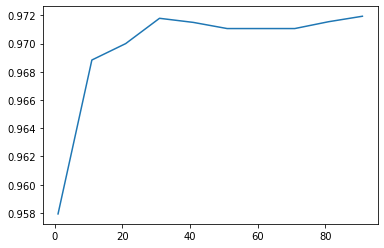

In [123]:
plt.plot(range(1,101,10),scorel)
plt.show()

2. use grid search to find the best max depth

In [133]:
# use Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':np.arange(1, 5, 1)}
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=1234
                            )
GS = GridSearchCV(rfc,param_grid,scoring='f1',cv=10)
GS.fit(X_train,y_train)
 
GS.best_params_

{'max_depth': 4}

In [134]:
 print('F1 SCORE IS:', GS.best_score_)

F1 SCORE IS: 0.8511497731653093


In [138]:
ypreds=rfc.predict(X_test)

In [139]:
print('f1 score score is',f1_score(y_test,ypreds))

f1 score score is 0.308095952023988


# 2. Binary prediction: Use LSTM to predict 1,0 label

In [106]:
np.random.seed(1234)  
PYTHONHASHSEED = 0
import keras
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
model_path = 'binary_model.h5'

# window size setting
sequence_length = 50

# mapping RUL into 1 and 0, 1:RUL<20, 0:RUL>=20
def get_label_2(mydata,label):
    from sklearn import preprocessing
    mydata=pd.merge(mydata,
             mydata.groupby('Asset id').size().reset_index(),on='Asset id',how='left')
    mydata['RUL']=mydata[0]-mydata['runtime']
    mydata[label]=0
    mydata.loc[mydata['RUL']<=20,label]=1
    y=mydata[label]
    cols_normalize = mydata.columns.difference(['Asset id','runtime','RUL','y'])
    norm_mydata = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(mydata[cols_normalize]), 
                                columns=cols_normalize, 
                                index=mydata.index)
    data_all = mydata[mydata.columns.difference(cols_normalize)].join(norm_mydata)
    mydata = data_all.reindex(columns = mydata.columns)
    mydata = mydata.reset_index(drop=True)
#    X_test=mydata.drop(columns=['y','RUL','Asset id','runtime'])
    X=mydata.drop(columns=[0,'RUL'])
    return mydata,X,y

train_all,X_train,y_train=get_label_2(training_set,'y')
test_all,X_test,y_test=get_label_2(testing_set,'y')

# reshape features into (samples, steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]
        
# pick the feature columns 
sensor_cols = ['Tag' + str(i) for i in range(1,22)]
sequence_cols = ['Setting1', 'Setting2', 'Setting3','runtime']
sequence_cols.extend(sensor_cols)

# generator for the sequences
seq_gen = (list(gen_sequence(X_train[X_train['Asset id']==id], sequence_length, sequence_cols)) 
           for id in X_train['Asset id'].unique())

# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

#  generate labels
def gen_labels(id_df, seq_length, label):
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    return data_matrix[seq_length:num_elements, :]

label_gen = [gen_labels(X_train[X_train['Asset id']==id], sequence_length, ['y']) 
             for id in X_train['Asset id'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

# build a deep network. 
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()

model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=nb_out, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

# fit the network
history = model.fit(seq_array, label_array, epochs=100, batch_size=200, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )

print(history.history.keys())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 50, 100)           50400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 100)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 80,651
Trainable params: 80,651
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
75/75 - 9s - loss: 0.3408 - accuracy: 0.8500 - val_loss: 0.3056 - val_accuracy: 0.8657
Epoch 2/100


In [108]:
ypreds = model.predict_classes(seq_array,verbose=1, batch_size=200)
y_test = label_array

79/79 [==============================] - 4s 44ms/step


In [110]:
print('f1 score score is',f1_score(y_test,ypreds))

f1 score score is 0.9045643153526971


# Regression: Use Xgboost regressor to predict RUL (continuous)

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from time import time
import datetime
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

In [154]:
train_all,X_train,y_train=get_rul(training_set,'RUL')
test_all,X_test,y_test=get_rul(testing_set,'RUL')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [155]:
df_train=xgb.DMatrix(X_train,y_train)
df_test=xgb.DMatrix(X_test,y_test)

### Cross Validataion (5-Fold)
### 1. find the best # of round

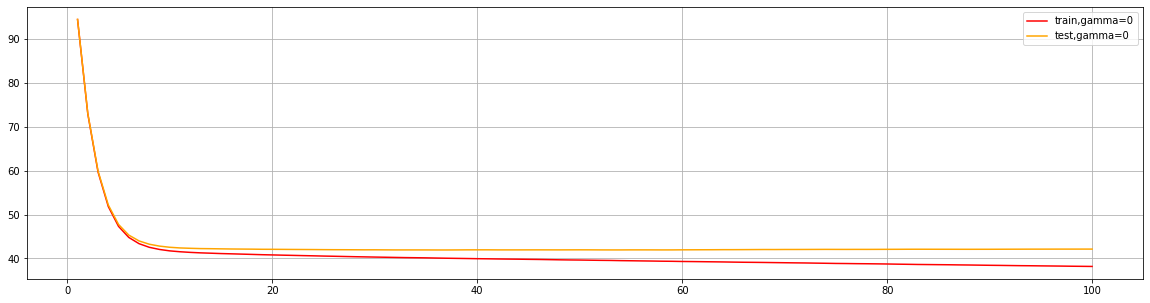

In [85]:
param1 = {'silent':True,'obj':'reg:linear',"gamma":0,"eta":0.31,'max_depth':3}
num_round = 100
n_fold=5 #sklearn - KFold

cvresult1 = xgb.cv(param1, df_train, num_round,n_fold)

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,num_round+1),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,num_round+1),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

### 2. find the best # of estimators

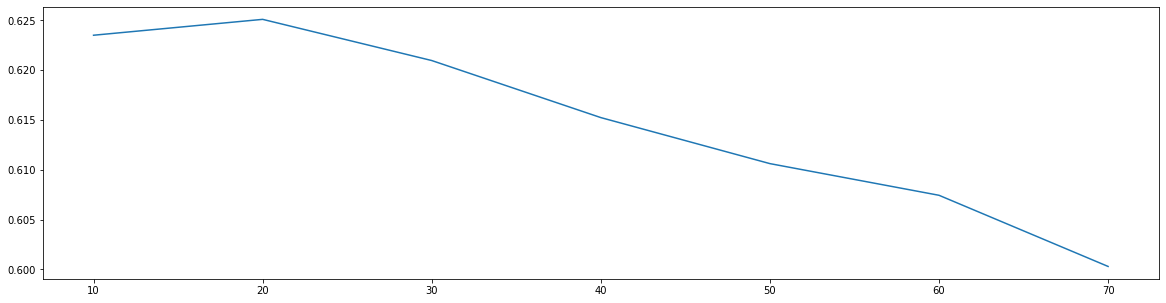

In [80]:
e=[]
evala=[]
i=0
eva='train'
for  eta in [i/100.0 for i in range(10,80,10)]:
    for max_depth in [3]:
            param2 = {'silent':True,'obj':'reg:linear'
                      ,"gamma":0
                      ,"eta":eta
                      ,'max_depth':max_depth,'booster':'dart'}
            bst=xgb.train(param2, df_train, 50)
            ypreds = bst.predict(df_test)
            e.append(eta)
            evala.append(r2_score(y_test,ypreds))
plt.figure(figsize=[20,5])
plt.plot(range(10,80,10),evala)
plt.show()

### 3.Find the best booster and max depth

In [102]:
max_d=[]
i=0
eva='train'

for max_depth in [2,3,4]:
    for booster in ['dart','gbtree','gblinear']:
            param2 = {'silent':True,'obj':'reg:linear'
                      ,"gamma":0
                      ,"eta":0.2
                      ,'max_depth':max_depth,'booster':booster}
            bst=xgb.train(param2, df_train, 50)
            ypreds = bst.predict(df_test)
            max_d.append(max_depth)
            print(booster,":","max_depth",max_depth,r2_score(y_test,ypreds))

dart : max_depth 2 0.6195736638821095
gbtree : max_depth 2 0.6195736642889005
gblinear : max_depth 2 -0.0024991520830470737
dart : max_depth 3 0.6250956739732001
gbtree : max_depth 3 0.6250956739515428
gblinear : max_depth 3 -0.0024870789882391886
dart : max_depth 4 0.6248019341256964
gbtree : max_depth 4 0.6248019373238367
gblinear : max_depth 4 -0.0025008243329860402


In [147]:
param_final={'silent':True,'obj':'reg:linear'
                      ,"gamma":0
                      ,"eta":0.2
                      ,'max_depth':3,'booster':'gbtree'}
bst=xgb.train(param_final, df_train, 50)
ypreds = bst.predict(df_test)

In [148]:
pd.DataFrame(zip(ypreds,y_test))

,0,1
0,124.656189,135
1,10.129141,2
2,172.914261,217
3,3.416459,0
4,140.485764,178
...,...,...
4122,186.148605,184
4123,98.407219,103
4124,109.778809,121
4125,115.801743,104


In [150]:
print('r2 score is',r2_score(y_test,ypreds))

r2 score is 0.6250956739515428


# Feature importance

In [151]:
pd.DataFrame(list(bst.get_fscore().items()),columns = ['variables','fscore']).sort_values(by='fscore',ascending=False)

,variables,fscore
5,Tag14,49
1,Tag9,39
0,Tag11,37
2,Tag4,27
3,Tag12,24
13,Tag13,24
12,Tag3,22
11,Tag8,18
9,Tag2,15
8,Tag21,15


In [153]:
pd.DataFrame(list(bst.get_fscore().items()),columns = ['variables','fscore']).sort_values(by='fscore',ascending=False).to_csv('feature_importance.csv')

In [156]:
ypreds = bst.predict(df_test)

In [159]:
pd.DataFrame(ypreds).to_csv('prediction.csv',index=False)